>Read1_TS
CTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNGGG

>Read1U
CTACACTCTTTCCCTACACGACGCTCTTCCGATCT

#Rev comp'd inner primers, without the index seq
>Alp_IgA_Inner
ctgggccccagctatgacaaggcatc
>Alp_IgE_Inner
ccccttgacctgttgcaaaaacaccaccg
>Alp_IgG1x_Inner
ctgactgctagatgcggggacacgc
>Alp_IgG2b_Inner
cccaatcctacaacagaatccaagtgtcccaaatgtcc
>Alp_IgG2c_Inner
gctccaagtgtcccaaatgcccagg
>Alp_IgM_InnerA
gagagctcgtctgccccgacactcttc
>Alp_IgM_InnerB
cgggacttcctgcctggctccatc

In [2]:
using NextGenSeqUtils, StatsBase, PyPlot
path = "C:/Users/lu_41/Desktop/Sofo Prok/VgeneData/Sequencer/Merged/BEN-27_S24_L001.vsearch_merged.fastq"

"C:/Users/lu_41/Desktop/Sofo Prok/VgeneData/Sequencer/Merged/BEN-27_S24_L001.vsearch_merged.fastq"

In [3]:
#checking for amount of reads
using BioSequences, FASTX

Ind27=open(FASTQ.Reader,path)

c = 0
for record in Ind27
    c += 1
end
println(c)
close(Ind27)


179339


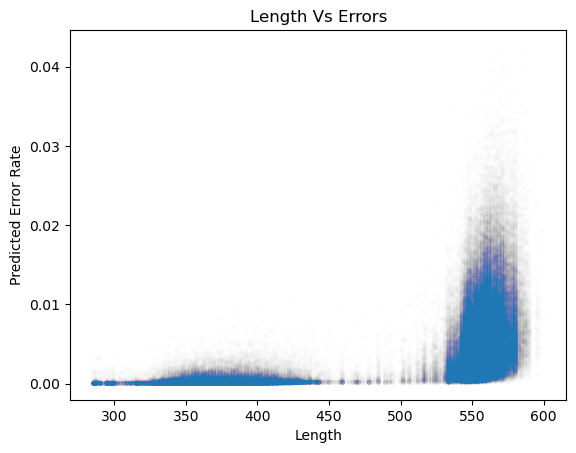

In [4]:
length_vs_qual(path, alpha = 0.002);

In [3]:
fastq_filter("C:/Users/lu_41/Desktop/Sofo Prok/BEN-27_S24_L001.vsearch_merged.fastq",
"C:/Users/lu_41/Desktop/Sofo Prok/BEN-27_S24_L001.vsearch_merged_filt.fastq",
    error_rate = 0.01, min_length = 500);

Reading file...
Calculating filter...
Writing file...


In [5]:
filt_seqs,_,_ = read_fastq("C:/Users/lu_41/Desktop/Sofo Prok/VgeneData/Sequencer/filteredMerge/BEN-27_S24_L001.vsearch_merged_filt.fastq");

In [6]:
#Setting up demux on reverse primer only.
named_primers = [["IgA","gatgccttgtcatagctggggccc"],
                ["IgE","cggtggtgtttttgcaacaggtca"],
                ["IgG1","gcgtgtccccgcatctagcagtca"],
                ["IgG2b","ggacatttgggacacttggattct"],
                ["IgG2c","cctgggcatttgggacacttggag"],
                ["IgM_A","gaagagtgtcggggcagacgagct"],
                ["IgM_B","gatggagccaggcaggaagtcccg"]]

rev_primers = [uppercase(np[2])[1:10] for np in named_primers]
rev_primer_names = [np[1] for np in named_primers];

In [7]:
#Running the demux
demux_dic = demux_dict(union(filt_seqs),["N"],rev_primers, tol_one_error = true);

(1, 1) => 275
(1, 2) => 77020
(1, 3) => 2
(1, 5) => 1
(1, 6) => 6


In [9]:
#Writing demuxed data to files (ONLY IgE AND IgA!!)
for i in 1:2
    demux_seqs = [s[1] for s in demux_dic[(1,i)]]
    write_fasta("C:/Users/lu_41/Desktop/Sofo Prok/VgeneData/$(rev_primer_names[i]).fasta",demux_seqs)
end